<a href="https://colab.research.google.com/github/chacha86/mldl/blob/main/mnist_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pickle
from PIL import Image

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y
# def softmax(input) :
#   max = np.max(input)
#   return np.exp(input - max) / np.sum(np.exp(input - max))
  

input1 = np.array([1010, 1000, 990])
input2 = np.array([0.3, 2.9, 4.0])
softmax(input1)
np.sum(softmax(input2))



1.0

In [9]:
# 바이트 데이터 읽어오기
def get_ndarr_by_bytes(file, size, len, pos) :
  images = []
  file.read(pos)
  for i in range(len) :
    buf = file.read(size)
    arr = np.frombuffer(buffer=buf, dtype=np.uint8, count=-1)
    images.append(arr)
  return np.array(images)

In [27]:
# 훈련 이미지 60000장
tr_imgs = open("/content/drive/MyDrive/딥러닝 자료/mnist/train-images.idx3-ubyte", 'rb')
trd = get_ndarr_by_bytes(tr_imgs, 28*28, 60000, 16)

In [68]:
# 훈련 라벨 60000개
tr_labels = open('/content/drive/MyDrive/딥러닝 자료/mnist/train-labels.idx1-ubyte', 'rb')
trt = get_ndarr_by_bytes(tr_labels, 1, 60000, 8)
trt = trt.squeeze()

In [60]:
# 테스트 이미지 10000장

ts_imgs = open('/content/drive/MyDrive/딥러닝 자료/mnist/t10k-images.idx3-ubyte', 'rb')
tsd = get_ndarr_by_bytes(ts_imgs, 28*28, 10000, 16)

In [67]:
# 훈련 라벨 10000개

ts_labels = open('/content/drive/MyDrive/딥러닝 자료/mnist/t10k-labels.idx1-ubyte', 'rb')
tst = get_ndarr_by_bytes(ts_labels, 1, 10000, 8)
tst = tst.squeeze()

In [32]:
# 가중치, 편향 데이터 -> 입력층이 784, 층수는 3층(입력, 50, 100, 출력) => W1 => 
with open("/content/drive/MyDrive/딥러닝 자료/mnist/sample_weight.pkl", 'rb') as f :
  weights = pickle.load(f)


(10000,)

In [69]:
def predict(network, x) :
  W1 = weights['W1']
  W2 = weights['W2']
  W3 = weights['W3']
  B1 = weights['b1']
  B2 = weights['b2']
  B3 = weights['b3']

  a1 = np.dot(x, W1) + B1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + B2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + B3
  y = softmax(a3)

  return y

accuracy_cnt = 0
for i in range(len(tsd)) :
  y = predict(weights, tsd[i])
  p = np.argmax(y)
  if p == tst[i] :
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(tsd)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy:0.9207


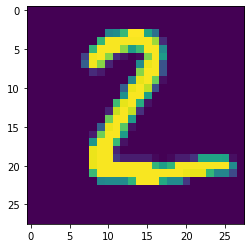

In [88]:
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image 

img = tsd[1]
img = img.reshape(28, -1)
imshow(img)


In [55]:
tst.shape

(10000, 1)

In [71]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(tsd), batch_size) :
  x = tsd[i : i + batch_size]
  y = predict(weights, x)
  p = np.argmax(y, axis=1)
  accuracy_cnt += np.sum(p == tst[i : i + batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(tsd))) #결과가 이상하다????


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy:0.9207


In [72]:
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(tsd), batch_size):
    x_batch = tsd[i:i+batch_size]
    y_batch = predict(weights, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == tst[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(tsd)))  # Accuracy:0.9352

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy:0.9207
